# Predicting the Success of Bank Telemarketing - Exploratory Data Analysis

Import libraries

In [1]:
#Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [2]:
#load and read the dataset
bank_df = pd.read_csv('Data/bank-additional-full.csv', sep= ";" )
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Exploratory Analysis - Read the data file and review the columns and entries. 

In [3]:
#review first 5 entries of bank telemarketing dataset 
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#shape of dataframe
bank_df.shape

(41188, 21)

In [5]:
#dtype of all columns
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#create a variable that holds all continous variables for later processing
continuous = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#create a variable that holds all categorical variables for later processing
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Recognize that the dataframe contains different dtypes that will need to be cleaned up for modeling. 

In [7]:
#summary statistics of all features
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
#check for any null values. 
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

This dataset contains no null values and therefore no columns will need to be dropped. 

In [9]:
#check for class imbalance on target Y variable. 
bank_df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Check on 'Y' feature for any class imbalance. In this instance, 'Y' denotes that customers subscribed and opened the bank's term deposit. Here we've identified that this data has a class imbalance in which only 11.3% of customers subscribed to the bank's term deposit, while the remaining 88.7% of customers did not. We also converted our target "Y" column into  

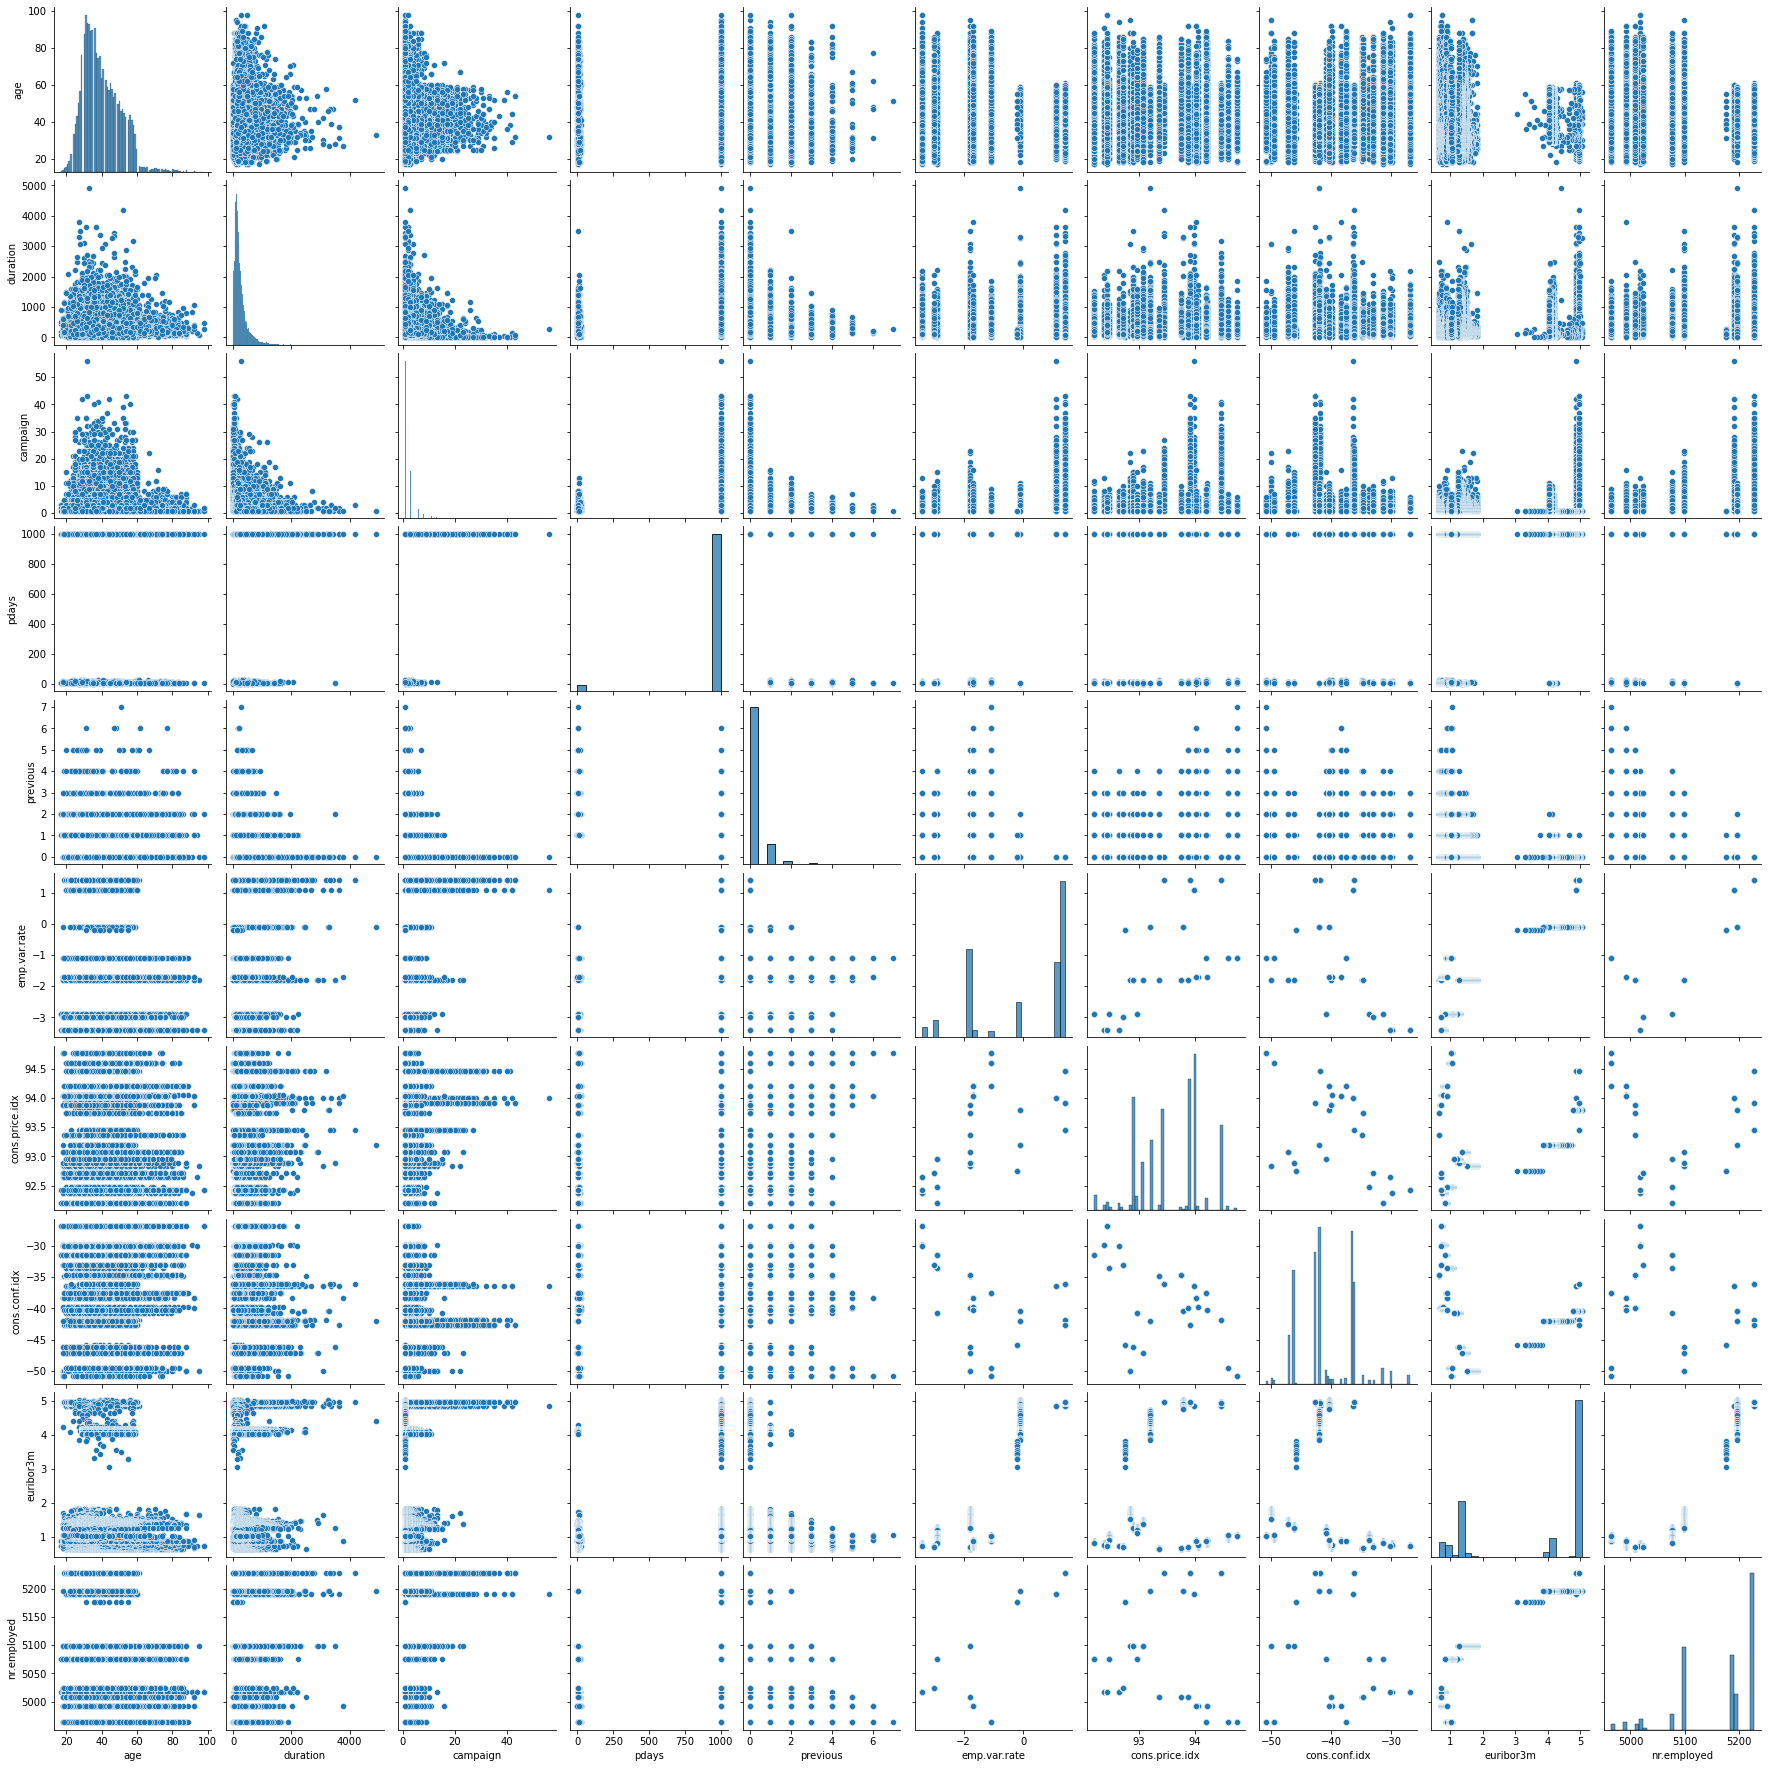

In [10]:
#pairplot of all columns to identify categorical and continuous features for further processing
sns.pairplot(data = bank_df)
plt.show()

# Functions 

In [11]:
def bargraph_target(feature, dataset):
    plt.figure(figsize=(15,5))
    Y = bank_df[feature]
    total = len(Y)*1
    ax = sns.countplot(x = feature, data = dataset, hue = "y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()


In [12]:
def distplot_continuous(feature):
    
    %matplotlib inline
    plt.figure(figsize=(10,8))
    sns.distplot(feature)
    return plt.show();

In [13]:
def plot_feature_importances(model):
    n_features = X_train_scaled.shape[1]
    plt.figure(figsize=(8,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# Target Variable Preprocessing

In [14]:
bank_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [15]:
bank_df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [16]:
bank_df['y'].replace({"no": 0, "yes": 1}, inplace = True)

We've replaced "no" with 0 and "yes" with 1 to make the target variable "y" numerical. 

# Variable Analysis - Categorical

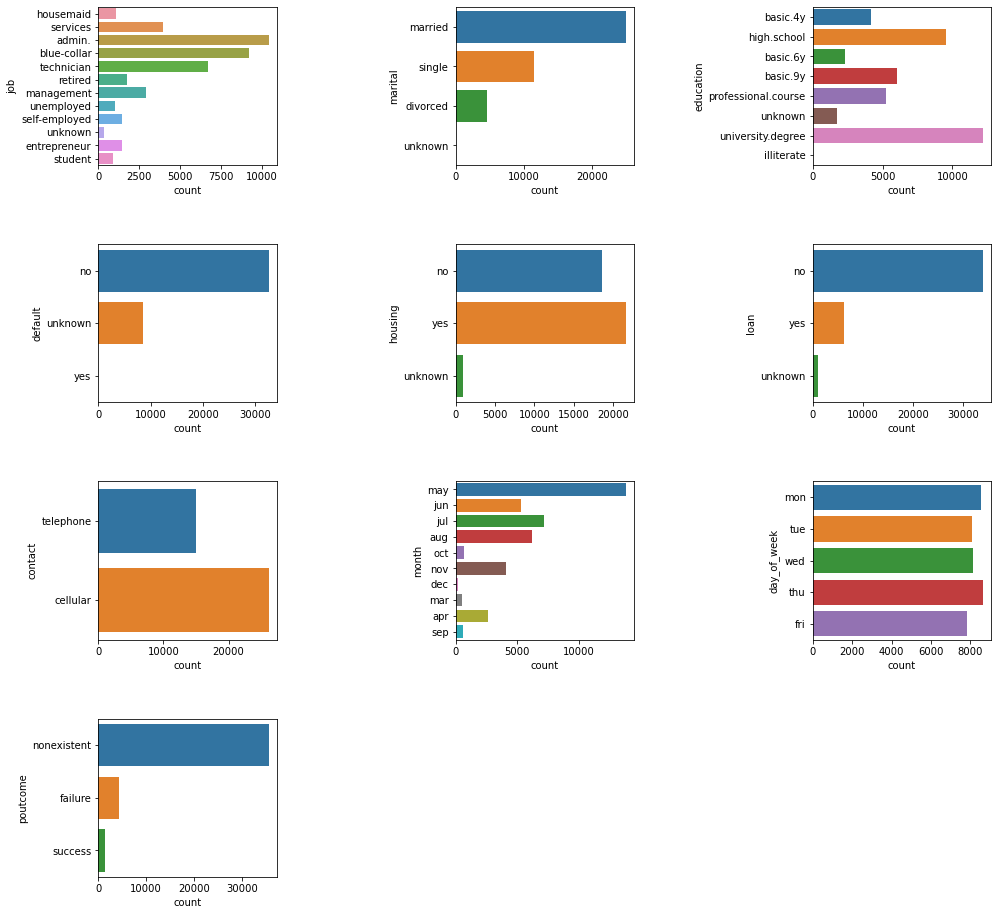

In [17]:
#visualize all categorical variables

fig, axes = plt.subplots(4, 3, figsize = (16,16))
plt.subplots_adjust(wspace = 1, hspace = 0.5)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical[i], data = bank_df, orient = "h", ax = ax)
    
plt.show();

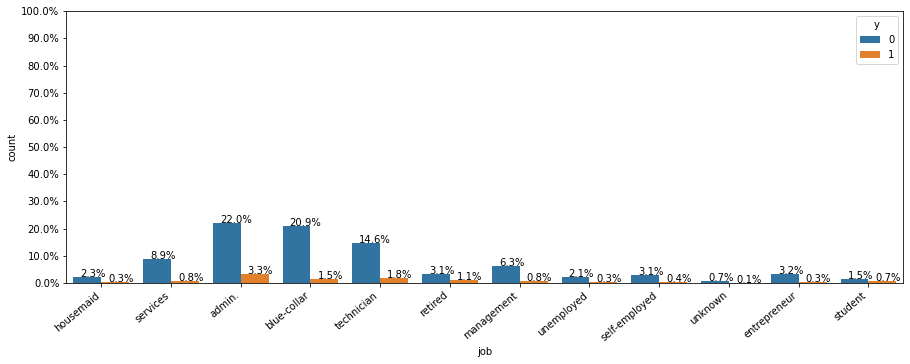

In [18]:
bargraph_target("job", bank_df)

Graphically, it looks like customers with admin jobs have the highest rate of subscribing across all occupations, followed by technicians and blue-collar workers. 

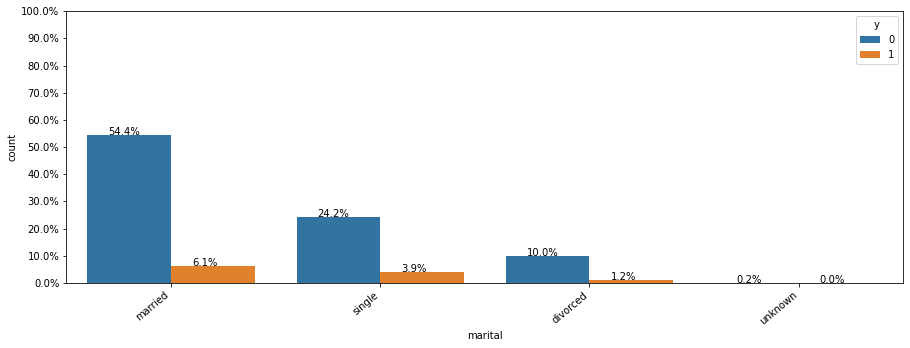

In [19]:
bargraph_target("marital", bank_df)

Married couples make a a large percentage of customers, but are also the most subscribed customers. 

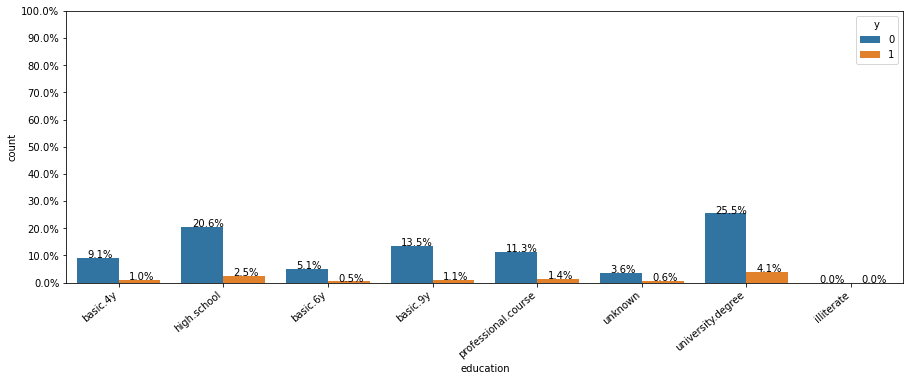

In [20]:
bargraph_target("education", bank_df)

Those with university degrees were the most highly subscribed subsector of customers to the bank's campaign. 

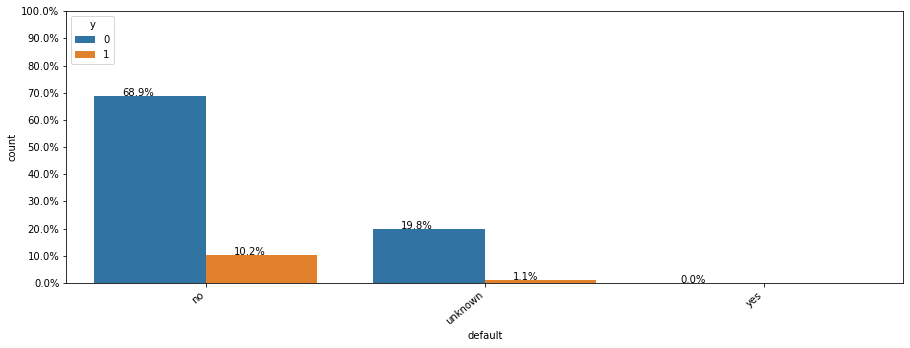

In [21]:
bargraph_target("default", bank_df)

Customers without any credit defaults were much highly likely to subscribe to the bank's campaign. 

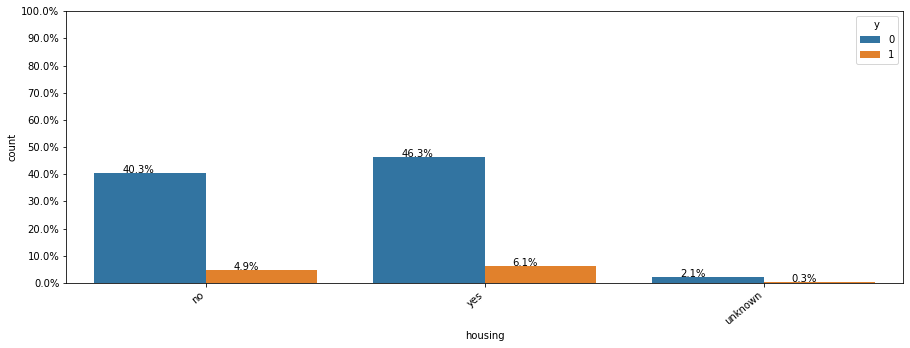

In [22]:
bargraph_target("housing", bank_df)

Those with a housing loan with the bank were likely to also have a term deposit. 

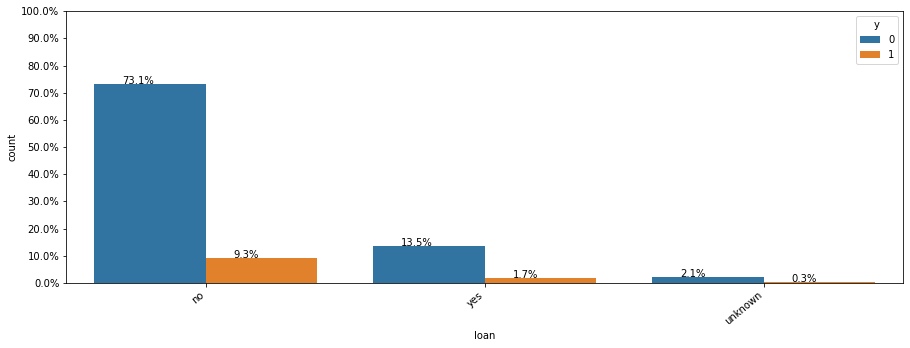

In [23]:
bargraph_target("loan", bank_df)

Customers who don't have a personal loan with the bank were more likely to subscribe to the term deposit. 

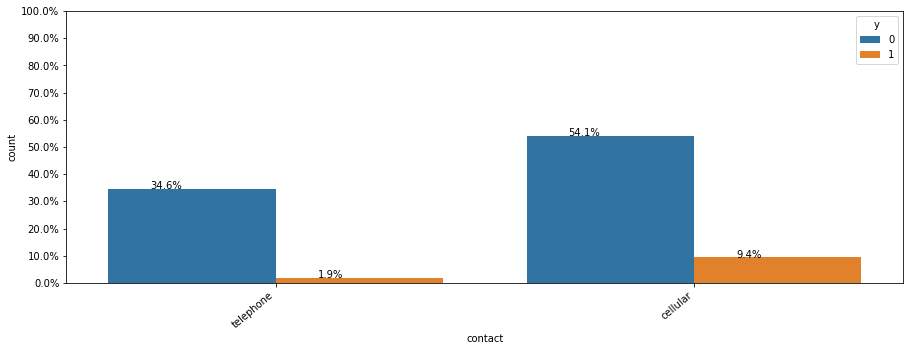

In [24]:
bargraph_target("contact", bank_df)

Customers who were contacted via cell phone were more likely to subscribe to the term deposit. 

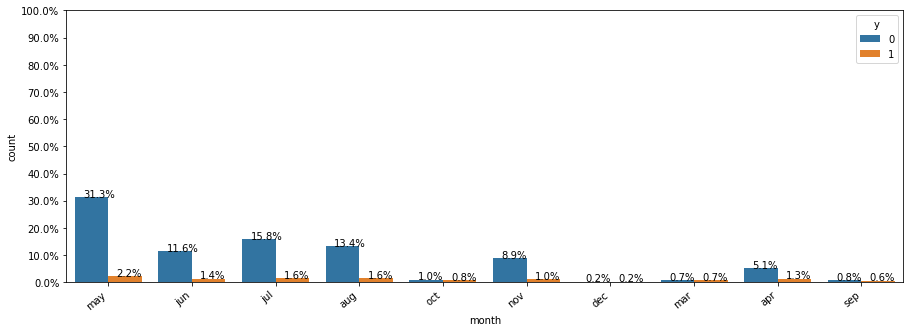

In [25]:
bargraph_target("month", bank_df)

May, followed by July and August, were the most recent months of contact prior to subscription. 

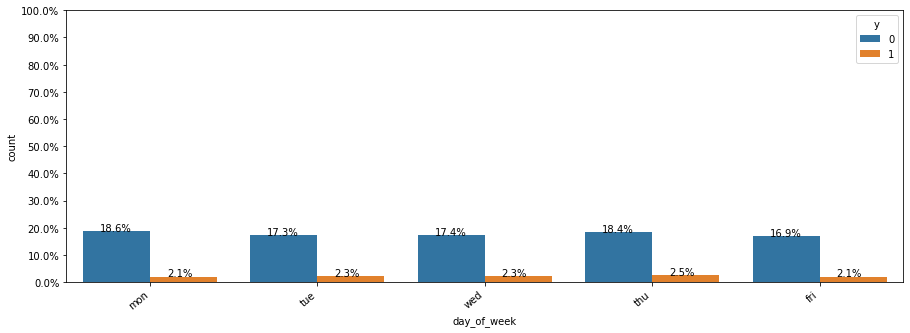

In [26]:
bargraph_target("day_of_week", bank_df)

Those who were last contacted on a Thursday had a slightly higher subscription rate. 

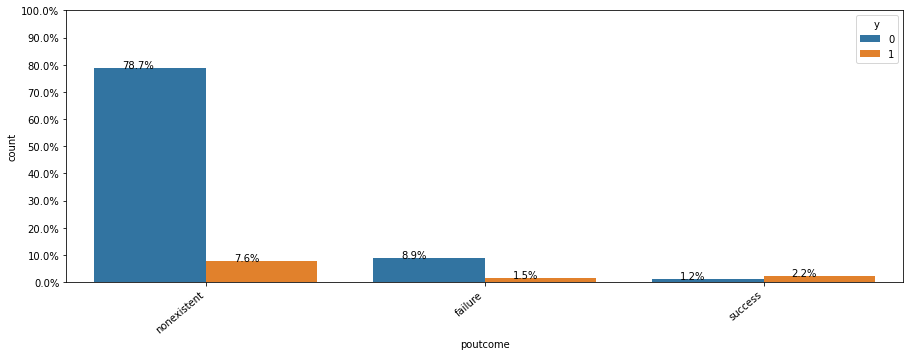

In [27]:
bargraph_target("poutcome", bank_df)

Most customers were tagged with nonexistent outcomes on the previous marketing campaign. Was a high degree of customers new? 

# Variable Analysis - Continuous 

In [28]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [29]:
continuous_bank_df = bank_df.select_dtypes(include=['float64', 'int64'])

In [32]:
continuous_variables = bank_df.describe().columns


In [33]:
type(continuous_variables)

pandas.core.indexes.base.Index

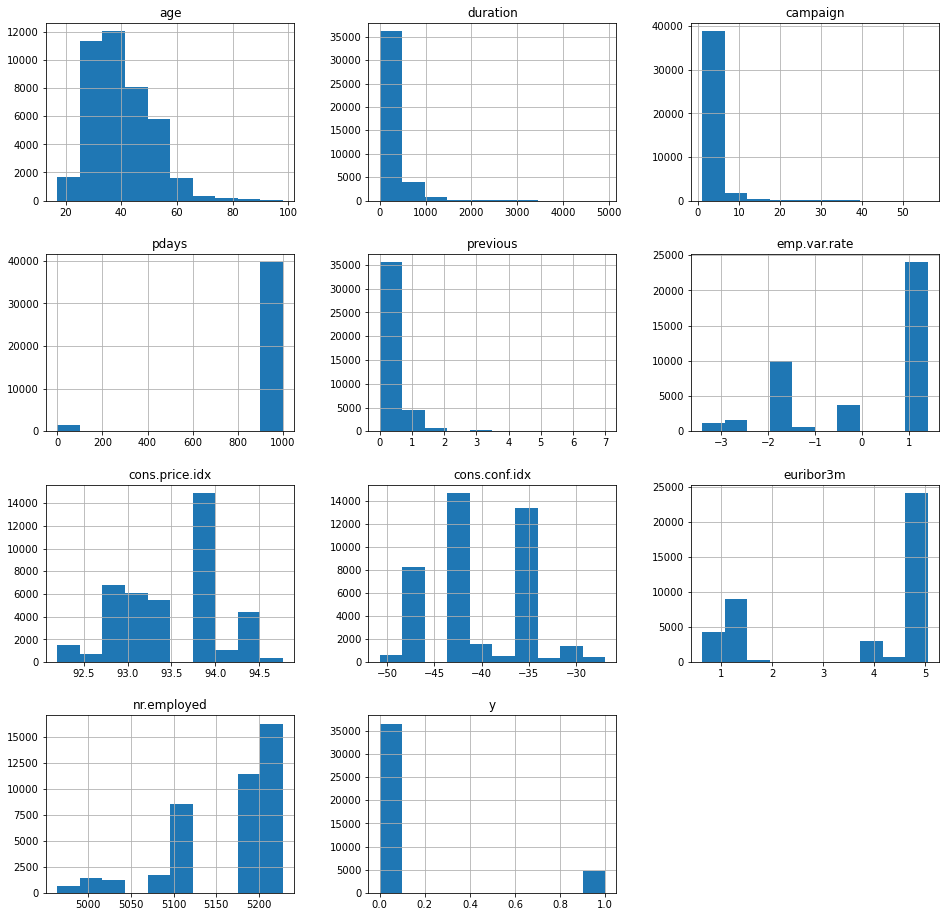

In [34]:
bank_df.hist(column = continuous_variables, figsize = (16,16))
plt.show()

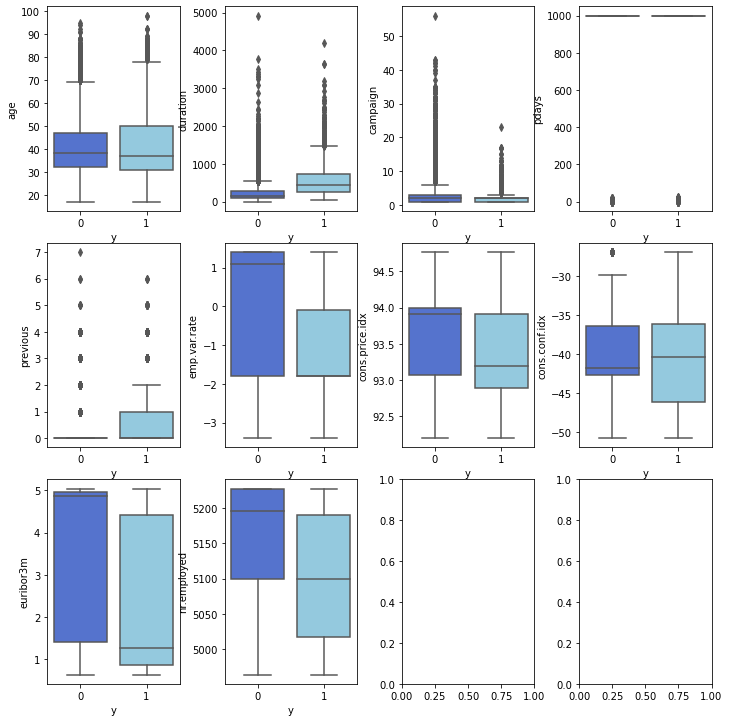

In [35]:
#plot out boxplots for all continuous variables vs. target to identify whether any features
#stand out in terms of difference between subscribed vs. not subscribed
fig, ax = plt.subplots(3, 4, figsize=(10, 10))
fig.tight_layout()
palette_color = {0: "royalblue", 1: "skyblue"}
for feature, subplot in zip(continuous_bank_df.drop('y', axis=1).columns, ax.flatten()):
    sns.boxplot(x = continuous_bank_df['y'], y = continuous_bank_df[feature],ax = subplot, palette = palette_color);



Looked at all continuous variables via boxplots to identify whether there are any trends. 

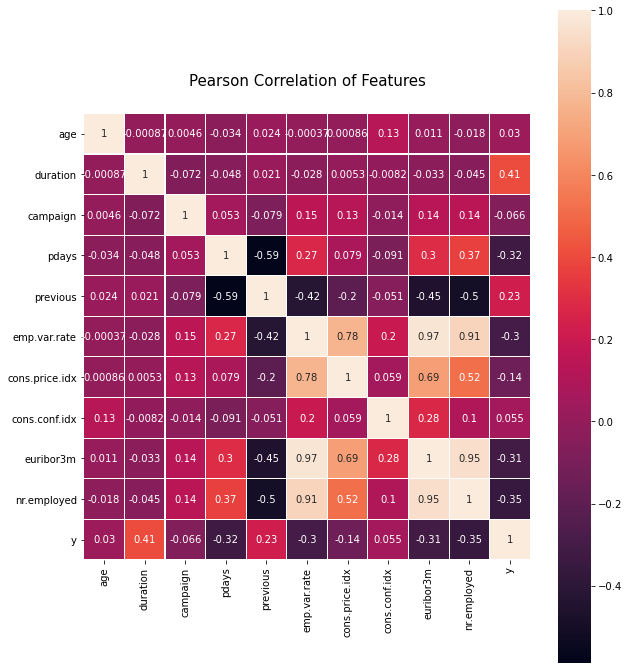

In [36]:
#plot heatmap of correlation matrix of continous varialbes to identify whether there's any collinearity
%matplotlib inline
corr = bank_df.corr()

fig, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson Correlation of Features", y=1.05, size=15);

Duration and previous both have high correlation to target variable. Note that the duration variable highly affects the output target. This attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

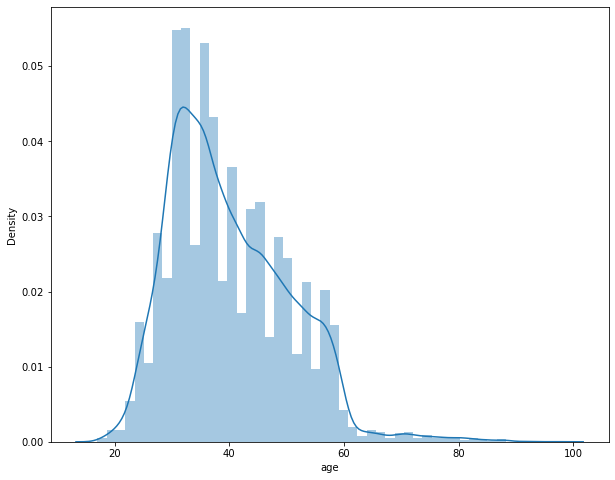

In [39]:
distplot_continuous(bank_df["age"])

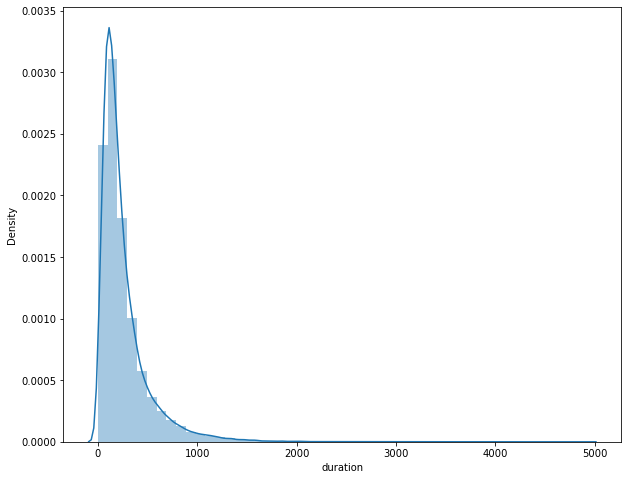

In [40]:
distplot_continuous(bank_df["duration"])

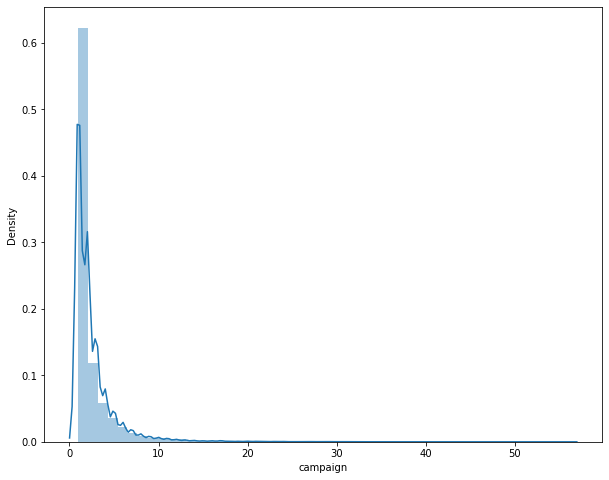

In [41]:
distplot_continuous(bank_df["campaign"])

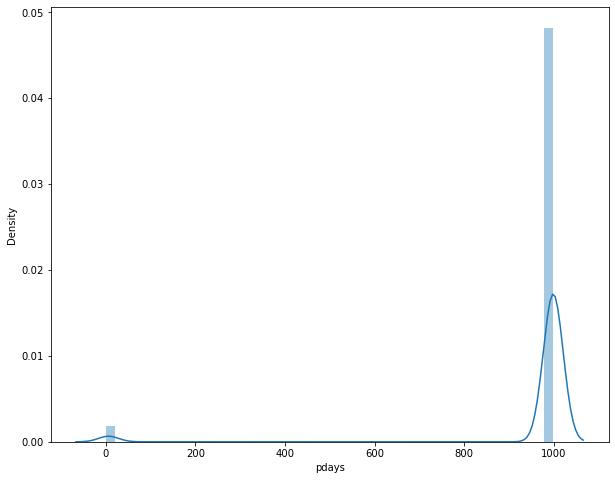

In [42]:
distplot_continuous(bank_df["pdays"])

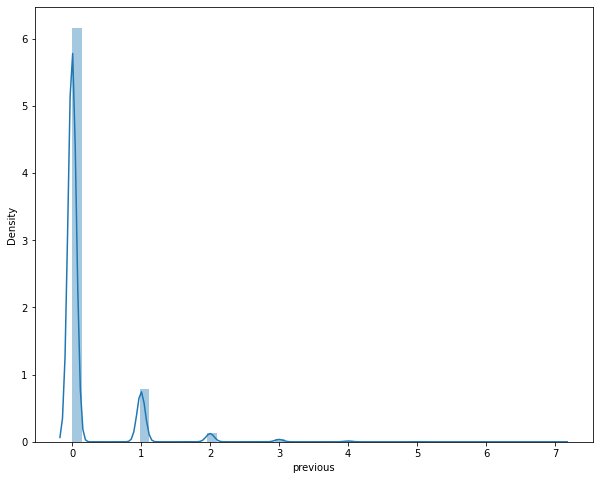

In [43]:
distplot_continuous(bank_df["previous"])

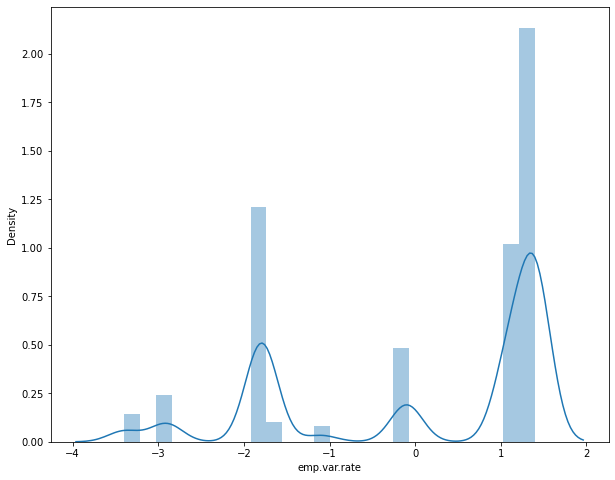

In [44]:
distplot_continuous(bank_df["emp.var.rate"])

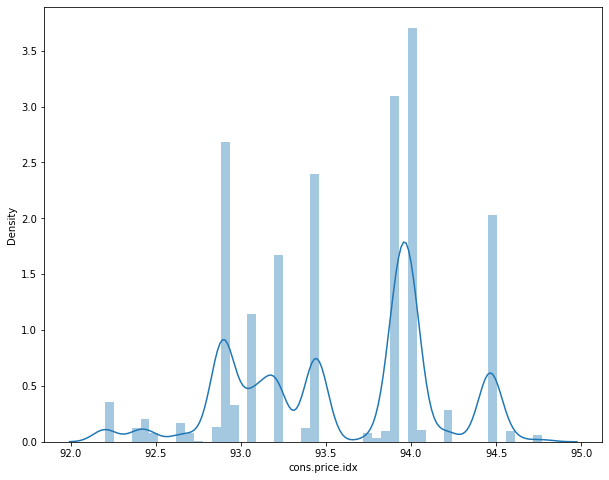

In [45]:
distplot_continuous(bank_df["cons.price.idx"])

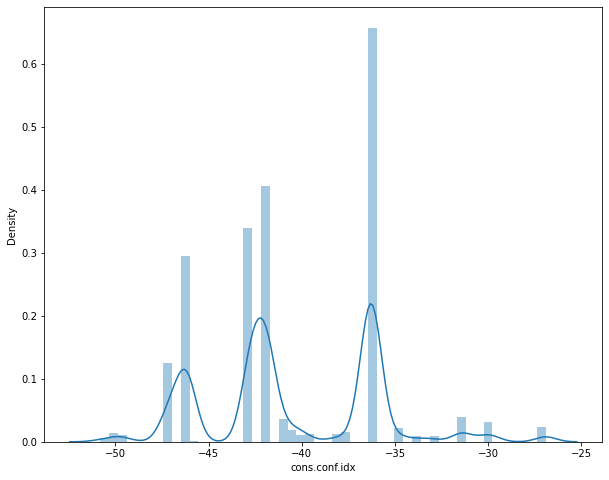

In [46]:
distplot_continuous(bank_df["cons.conf.idx"])

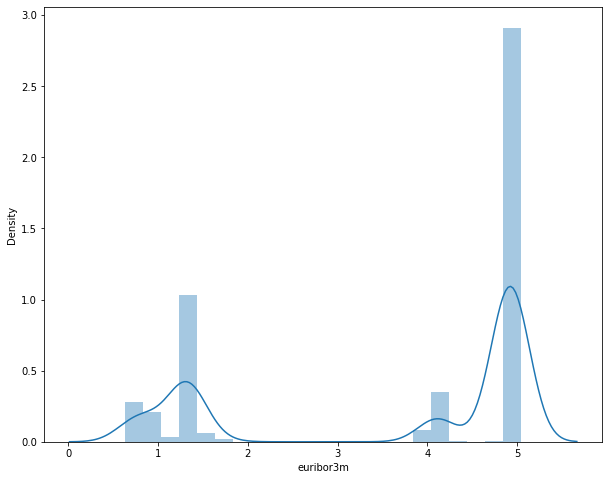

In [47]:
distplot_continuous(bank_df["euribor3m"])

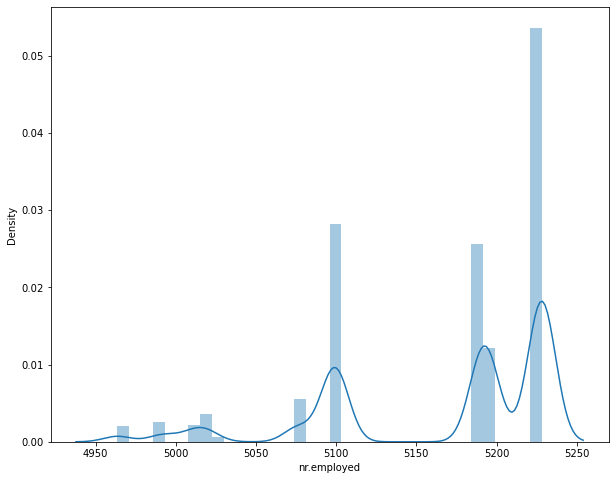

In [48]:
distplot_continuous(bank_df["nr.employed"])

# Data Preprocessing

In [49]:
#identify new df with duplicated values
bank_df_duplicated = bank_df[bank_df.duplicated(keep = "last")]
bank_df_duplicated

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [50]:
#check on shape of duplicated dataframe
bank_df_duplicated.shape

(12, 21)

In [52]:
#drop duplicates
bank_df = bank_df.drop_duplicates()

In [53]:
#check on dataframe after duplicates have been dropped. We see that we now decreased our rows by the 12 duplicated entries from 41,188 to 41,176
bank_df.shape

(41176, 21)

In [54]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Convert pdays from continuous to categorical, as most values are 999

In [60]:
#convert pdays from numeric to categorical
bank_df['pdays'] = ([0 if each == 999 else 1 for each in bank_df['pdays']])
bank_df['pdays']

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    1
41186    1
41187    1
Name: pdays, Length: 41176, dtype: int64

In [62]:
#create a variable that holds all continous variables for later processing
continuous = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#create a variable that holds all categorical variables for later processing
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays']

Separating Independent and Target Variables 

In [63]:
#dropping target variable out of predictors
X = bank_df.drop('y', axis = 1)

#setting target with y 
y = bank_df['y']

Train Test Split

In [64]:
#import train test split
from sklearn.model_selection import train_test_split

#first train test split to obtain training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#second train test split to obtain training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)



In [65]:
#checking for shape sizing 
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)


X_train: (26352, 20)
X_val: (6588, 20)
X_test: (8236, 20)
y_train: (26352,)
y_val: (6588,)
y_test: (8236,)


Encoding Categorical Features

In [66]:
categorical


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'pdays']

In [67]:
bank_df_categorical = X_train[categorical]
bank_df_continuous = X_train[continuous]

In [68]:
X_categorical = bank_df_categorical.columns
X_continouous = bank_df_continuous.columns

Creating a Pipeline for further preprocessing

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import xgboost as xg
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,log_loss, plot_confusion_matrix
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipeline

import warnings

In [70]:
from sklearn.pipeline import Pipeline 
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import DictVectorizer
#preprocessing the pipeline with standard scaler and one hot encoder

Continous_transform = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

Categorical_transform = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                          sparse=False))
    ])

pp = ColumnTransformer(transformers=[
    ('continous', Continous_transform, X_continouous),
    ('categorical', Categorical_transform, X_categorical)
    ])

In [73]:
#transform pipeline and convert back into dataframe

X_train_scaled = pp.fit_transform(X_train)
X_val_scaled = pp.transform(X_val)

In [74]:
#aggregating dataframes of categorical and continous variables into one dataframe

categorical_names = pp.transformers_[1][1].named_steps['ohe'].get_feature_names(X_categorical).tolist()
feature_names = list(X_continouous) + categorical_names

X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = feature_names)

# Dummy Model

In [75]:
#import baseline model library 
from sklearn.metrics import roc_auc_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

In [76]:
#create a dummy model for data
dummy_model = DummyClassifier(strategy = "most_frequent")

#fit the model
dummy_model.fit(X_train_scaled, y_train)

# score the model
dummy_model.score(X_train_scaled, y_train)
#classifier model

dummy_model.score(X_val_scaled, y_val)

0.8891924711596843

In [77]:
#we see that the dummy model and the class imbalance reveal very similar scores as the dummy model is predicting on the majority class, which is around 88.73%
dummy_model.score(X_val_scaled, y_val)


0.8891924711596843

# Model 1 - Logistic Regression Baseline Model 

In [78]:
#instantiate logistic regression model
logistic_model = LogisticRegression(random_state = 42)

#fit the model
logistic_model.fit(X_train_scaled, y_train)

logistic_model_preds = logistic_model.predict(X_val_scaled)

print(f" AUC score: {roc_auc_score(logistic_model_preds, y_val)}")
print('Classification Report', "\n")
print(classification_report(y_val, logistic_model_preds))

 AUC score: 0.7904080861175116
Classification Report 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5858
           1       0.65      0.45      0.53       730

    accuracy                           0.91      6588
   macro avg       0.79      0.71      0.74      6588
weighted avg       0.90      0.91      0.91      6588



Confusion Matrix

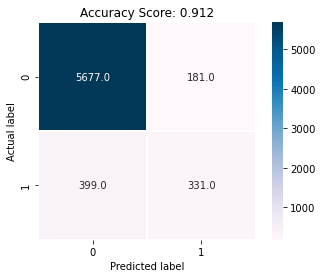

In [79]:
score = round(accuracy_score(y_val, logistic_model_preds),3) 
confusion_matrix = cm(y_val, logistic_model_preds)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

Error Evaluation

In [80]:
mae = mean_absolute_error(logistic_model_preds, y_val)
mse = mean_squared_error(logistic_model_preds, y_val)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print("\n")

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30




# Model 2 - Random Forest Classifier

In [81]:
random_forest = RandomForestClassifier(criterion = 'entropy', 
                                       n_estimators = 10,
                                       max_depth = 10, 
                                       bootstrap = True,
                                       min_samples_split = 5,
                                       random_state = 42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=10, random_state=42)

In [82]:
random_forest_preds = random_forest.predict(X_val_scaled)
print(classification_report(y_val, random_forest_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5858
           1       0.72      0.35      0.47       730

    accuracy                           0.91      6588
   macro avg       0.82      0.67      0.71      6588
weighted avg       0.90      0.91      0.90      6588



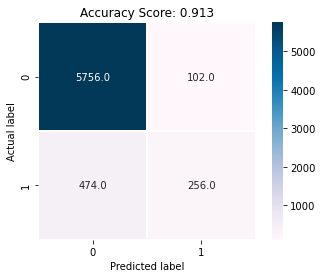

In [83]:
score = round(accuracy_score(y_val, random_forest_preds),3) 
confusion_matrix = cm(y_val, random_forest_preds)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [84]:
mae = mean_absolute_error(random_forest_preds, y_val)
mse = mean_squared_error(random_forest_preds, y_val)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print("\n")

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30




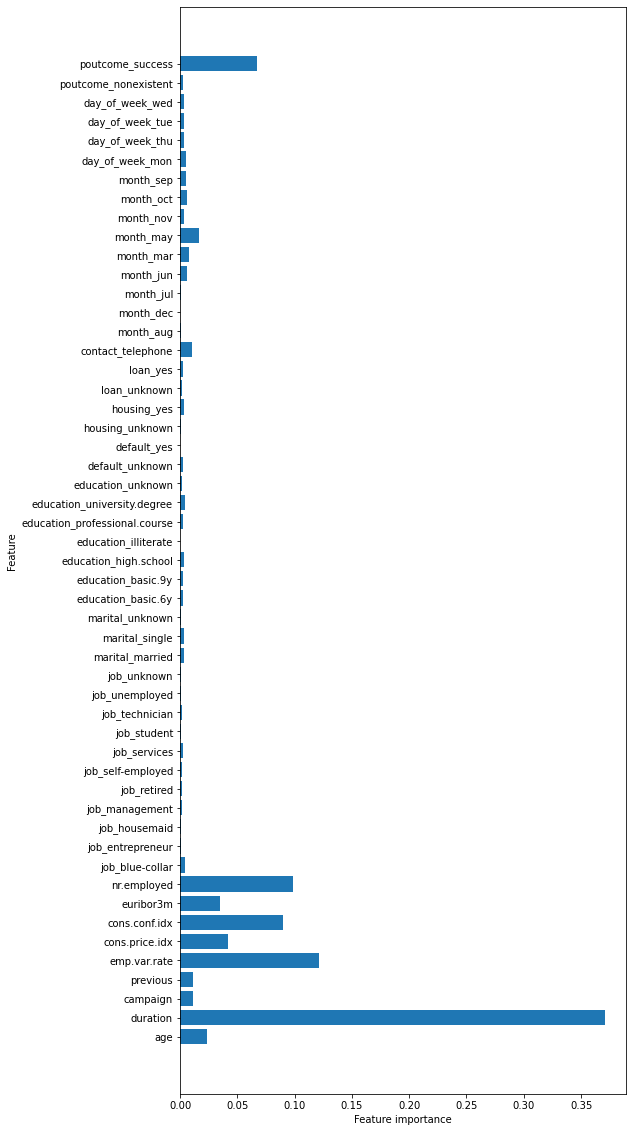

In [85]:
plot_feature_importances(random_forest)

# Model 3 - XG Boost

In [86]:
xg_boost = XGBClassifier(random_state = 42,
                         objective = 'binary:logistic',
                         eta = 0.5, 
                         max_depth = 10,
                         alpha = 2)
xg_boost.fit(X_train_scaled, y_train)

XGBClassifier(alpha=2, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.5, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=2, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
xg_boost_preds = xg_boost.predict(X_val_scaled)
print(classification_report(y_val, xg_boost_preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5858
           1       0.59      0.55      0.56       730

    accuracy                           0.91      6588
   macro avg       0.76      0.75      0.76      6588
weighted avg       0.90      0.91      0.91      6588



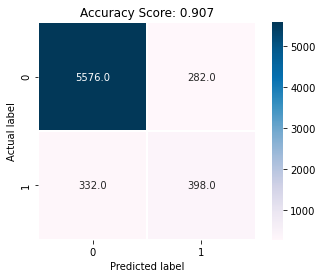

In [88]:
score = round(accuracy_score(y_val, xg_boost_preds),3) 
confusion_matrix = cm(y_val, xg_boost_preds)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [89]:
mae = mean_absolute_error(xg_boost_preds, y_val)
mse = mean_squared_error(xg_boost_preds, y_val)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print("\n")

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.31




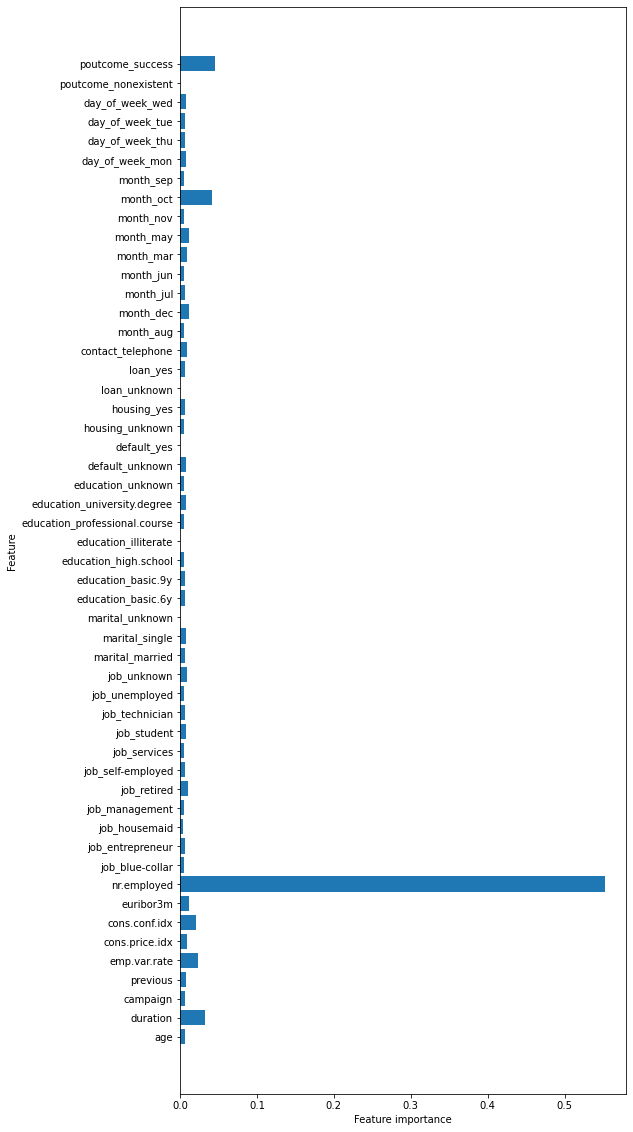

In [90]:
plot_feature_importances(xg_boost)

# Model 4 - Gradient Boost

In [91]:
gradient_boost = GradientBoostingClassifier(random_state = 42)
gradient_boost.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [92]:
gradient_boost_preds = gradient_boost.predict(X_val_scaled)
print(classification_report(y_val, gradient_boost_preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5858
           1       0.65      0.55      0.60       730

    accuracy                           0.92      6588
   macro avg       0.80      0.76      0.78      6588
weighted avg       0.91      0.92      0.91      6588



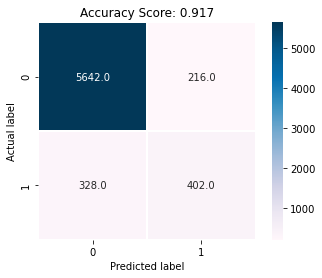

In [93]:
score = round(accuracy_score(y_val, gradient_boost_preds),3) 
confusion_matrix = cm(y_val, gradient_boost_preds)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [94]:
mae = mean_absolute_error(gradient_boost_preds, y_val)
mse = mean_squared_error(gradient_boost_preds, y_val)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print("\n")

Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.29




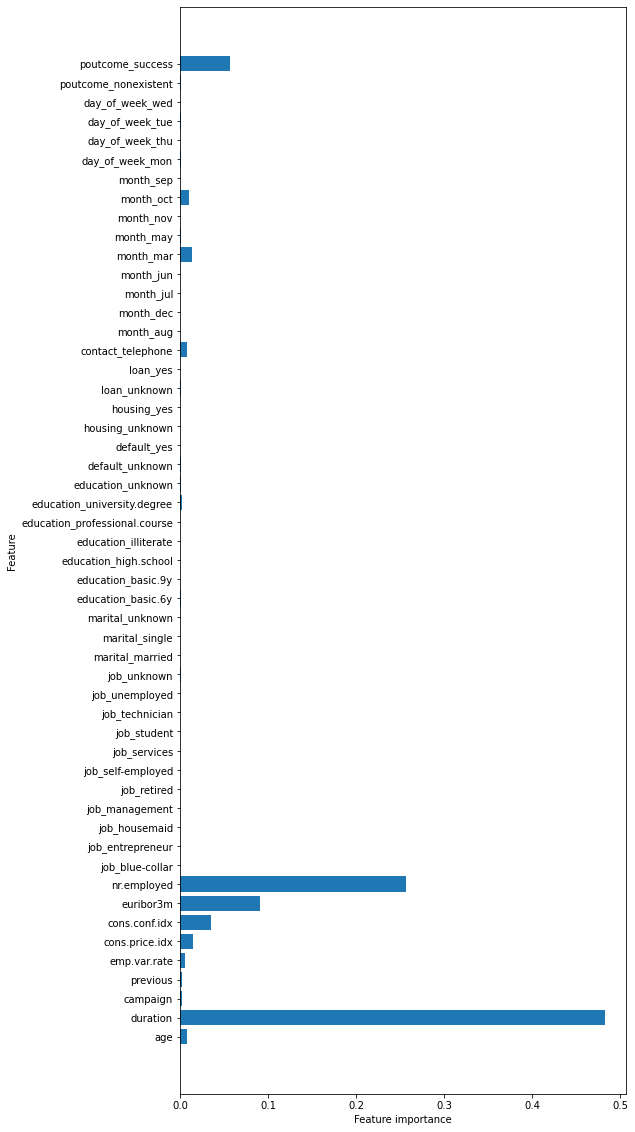

In [95]:
plot_feature_importances(gradient_boost)